
Graph Theory Analysis: P-value Matrix|Allegiance Matrix
============================================
### Group 1 (HC|SCI)  |  (SCI_c|SCI_t)

In [1]:
import os
import numpy as np
import pandas as pd
import random
from datetime import datetime
from nilearn import datasets

# Using the NiftiLabelsMasker
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from brainconn import degree, centrality, clustering, core, distance, modularity, utils
from nilearn import plotting 
from matplotlib.colors import ListedColormap
# !pip install git+https://github.com/FIU-Neuro/brainconn#egg=brainconn

#%% shaded ERROR BAR
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.stats.multitest as smm
import seaborn as sns
import string  

import scipy.io as sio 
from scipy.io import savemat
# pip install teneto
# https://teneto.readthedocs.io/en/latest/tutorial.html
# https://teneto.readthedocs.io/en/latest/tutorial/networkmeasures.html
from teneto import communitymeasures
from nilearn import datasets

from matplotlib.patches import Rectangle
import mne
import mne.viz
# from mne.viz import plot_connectivity_circle
# import plot_connectivity_circle
from mne_connectivity.viz import plot_connectivity_circle

from joblib import Parallel, delayed
# import nibabel as nib
# from surfer import Brain
# from mayavi import mlab
# from netneurotools import stats as nnstats
# from netneurotools import datasets

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
start_time = datetime.now()

# Automatic atlas fetching
#atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

save_fig_to = '/Users/ismaila/Documents/C-Codes/SCI_GraphTheory'

atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
atlas.region_coords = [(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)]

# Loading atlas image stored in 'maps'
atlas_filename = atlas.maps
# Loading atlas data stored in 'labels'
labels = atlas.labels
labels = atlas.labels.astype('U') # covert array of bytes to array of strings

# Setting systems' labels
roi = 200
atlas.systems = [None] * roi
atlas.systems[7] = "Visual (LH)"
atlas.systems[22] = "Somatomotor (LH)"
atlas.systems[37] = "Dorsal Attention (LH)"
atlas.systems[49] = "Ventral Attention (LH)"
atlas.systems[57] = "Limbic (LH)"
atlas.systems[67] = "Frontoparietal (LH)"
atlas.systems[87] = "Default (LH)"
atlas.systems[108] = "Visual (RH)"
atlas.systems[125] = "Somatomotor (RH)"
atlas.systems[141] = "Dorsal Attention (RH)"
atlas.systems[153] = "Ventral Attention (RH)"
atlas.systems[161] = "Limbic (RH)"
atlas.systems[173] = "Frontoparietal (RH)"
atlas.systems[191] = "Default (RH)"
systems = atlas.systems

# Define your own list of colors
my_colors = ['#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D']

# Create a custom colormap
cmap = ListedColormap(my_colors)

# # Plot the ROI and save as PDF
# fig = plotting.plot_roi(atlas_filename, cmap=cmap)
# fig.savefig(save_fig_to + '/fig/yeo7.pdf', dpi = 300)

# print('Atlas ROIs are located in nifti image (4D) at: %s' %atlas_filename)  # 4D data

### Load data from Group 1

In [3]:
#%% Load the functional datasets (hc and sci, or sci_c and sci_t) and 
# extract signals (timeseries) on a parcellation defined by labels
# then calculating the correlation and binarized matrices
# ----------------------------------------------------

# masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
#                            memory='nilearn_cache', verbose=5)

masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)

data_path = '/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/02_postNR'

analysis = 'ALL' # 'ALL' subjects or 'SCI' ONLY

if analysis == "ALL":
    group = ['hc', 'sci']; group_label = ['Healthy Control', 'Spinal Cord Injury']
elif analysis == "SCI":
    group = ['sci_c', 'sci_t']; group_label = ['Cervical SCI', 'Thoracic SCI']

corr_measure = ConnectivityMeasure(kind='correlation') # kind{“correlation”, “partial correlation”, “tangent”, “covariance”, “precision”}, optional


In [4]:
#=============================================================================
ts_g1, ts_g2 = [], []

nii_g1 = sorted(os.listdir(data_path+'/'+ group[0]))
nii_g1 = [x for x in nii_g1 if x.startswith('errts')] # remove not-nifti elements
nii_g2 = sorted(os.listdir(data_path+'/'+ group[1]))
nii_g2 = [x for x in nii_g2 if x.startswith('errts')] # remove not-nifti elements

# reading the nifti files
for nii in nii_g1: # healthy controls
    ts_g1.append(masker.fit_transform(data_path + '/'+ group[0] + '/'+ nii)) # ts_g = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from G1 dataset: '+'{}\n'.format(nii))
for nii in nii_g2: # patients
    ts_g2.append(masker.fit_transform(data_path + '/'+ group[1] + '/'+ nii)) # ts_g2 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from G2 dataset:'+'{}\n'.format(nii))
# saving numpy arrays (timeseries)
np.save('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/ts_' + group[0], ts_g1) 
np.save('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/ts_' + group[1], ts_g2)   

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
Resampling labels
[Memory]0.2s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.14275.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]0.3s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.14275.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]0.3s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min

[Memory]1.6s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nc20110804kk.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]1.6s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nc20110830si.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]1.7s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nc20120830jm.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2

[Memory]2.8s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nckirby502.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]2.9s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nckirby502.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]3.0s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nckirby505.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Sc

[Memory]4.1s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nckirby934.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]4.2s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nckirby934.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]4.2s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.nckirby959.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Sc

[Memory]5.3s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G2 dataset:errts.56297.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]5.4s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G2 dataset:errts.60970.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]5.4s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G2 dataset:errts.60970.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parc

[Memory]6.6s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G2 dataset:errts.sci20121127js.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]6.7s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G2 dataset:errts.sci20130708jh.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]6.7s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G2 dataset:errts.sci20130708jh.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [
/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' inste

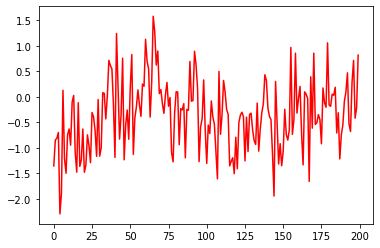

In [5]:
# loading numpy arrays (timeseries)
ts_g1 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/ts_' + group[0] + '.npy', allow_pickle=True))
ts_g2 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/ts_' + group[1] + '.npy', allow_pickle=True))

# calculating correlations
corr_g1 = corr_measure.fit_transform(ts_g1)
corr_g2 = corr_measure.fit_transform(ts_g2)
# Save arrays into a MATLAB-style .mat file for modularity


corr_path = '/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/fc/'

# corr_hc.mat corr_sci.mat
savemat(corr_path + 'corr_'+group[0]+'.mat', {'corr_'+group[0]: corr_g1})
savemat(corr_path + 'corr_'+group[1]+'.mat', {'corr_'+group[1]: corr_g2})

# plot a subject's timeseries
plt.plot(np.arange(0, 200), ts_g1[0][4,:].transpose(), color='red')
plt.show()

#%% Display the mean correlation and binarized matrices

thld = 0.3

# calculate the mean correlation and binary matrices
corr_g1_mean = np.mean(corr_g1, axis=0)
corr_g2_mean = np.mean(corr_g2, axis=0)
bin_g1_mean = utils.binarize(utils.threshold_proportional(corr_g1_mean, thld, copy=True))
bin_g2_mean = utils.binarize(utils.threshold_proportional(corr_g2_mean, thld, copy=True))

# general plot settings
split = np.array([-0.5, 13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5, 199.5])
color = ['#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D',
         '#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D']

In [6]:
print(f'{analysis} has {len(ts_g1)} {group[0]} & {len(ts_g2)} {group[1]}')

ALL has 76 hc & 61 sci


## Group 2 SCIc | SCIt 

In [7]:
# ###############################################################################
# #%% Load the functional datasets (hc and sci, or sci_c and sci_t) and 
# # extract signals (timeseries) on a parcellation defined by labels
# # then calculating the correlation and binarized matrices

# # masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
# #                            memory='nilearn_cache', verbose=5)

# masker = NiftiLabelsMasker(
#     labels_img=atlas_filename,
#     standardize="zscore_sample",
#     standardize_confounds="zscore_sample",
#     memory="nilearn_cache",
#     verbose=5,
# )

# data_path = '/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/02_postNR'

# analysis = 'SCI' # 'ALL' subjects or 'SCI' ONLY

# if analysis == "ALL":
#     group = ['hc', 'sci']; group_label = ['Healthy Control', 'Spinal Cord Injury']
# elif analysis == "SCI":
#     group = ['sci_c', 'sci_t']; group_label = ['Cervical SCI', 'Thoracic SCI']

# corr_measure = ConnectivityMeasure(kind='correlation') # kind{“correlation”, “partial correlation”, “tangent”, “covariance”, “precision”}, optional


In [4]:
# #=============================================================================
# ts_g1, ts_g2 = [], []

# nii_g1 = sorted(os.listdir(data_path+'/'+ group[0]))
# nii_g1 = [x for x in nii_g1 if x.startswith('errts')] # remove not-nifti elements
# nii_g2 = sorted(os.listdir(data_path+'/'+ group[1]))
# nii_g2 = [x for x in nii_g2 if x.startswith('errts')] # remove not-nifti elements

# # reading the nifti files
# for nii in nii_g1: # healthy controls
#     ts_g1.append(masker.fit_transform(data_path + '/'+ group[0] + '/'+ nii)) # ts_g = masker.fit_transform(fmri_filenames, confounds=data.confounds)
#     print('Loading from G1 dataset: '+'{}\n'.format(nii))
# for nii in nii_g2: # patients
#     ts_g2.append(masker.fit_transform(data_path + '/'+ group[1] + '/'+ nii)) # ts_g2 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
#     print('Loading from G2 dataset:'+'{}\n'.format(nii))
# # saving numpy arrays (timeseries)
# np.save('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/ts_' + group[0], ts_g1) 
# np.save('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/ts_' + group[1], ts_g2)   

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
Resampling labels
[Memory]0.2s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.sci20110427pr.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]0.3s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.sci20110427pr.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]0.4s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loade

[Memory]1.7s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.sci20140606rc.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]1.7s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.sci20140606rc.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]1.8s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G1 dataset: errts.sci20140609jd.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefe

[Memory]3.3s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G2 dataset:errts.56297.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]3.3s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G2 dataset:errts.56297.r02.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]3.4s, 0.1min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from G2 dataset:errts.60970.r01.fanaticor+tlrc.nii

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parc

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [
/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' inste

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [
/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' inste

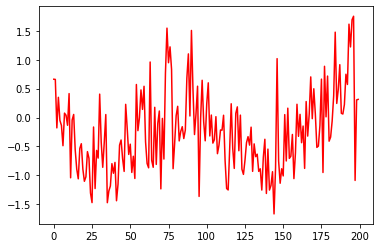

In [5]:
# # loading numpy arrays (timeseries)
# ts_g1 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/ts_' + group[0] + '.npy', allow_pickle=True))
# ts_g2 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/ts_' + group[1] + '.npy', allow_pickle=True))

# # calculating correlations
# corr_g1 = corr_measure.fit_transform(ts_g1)
# corr_g2 = corr_measure.fit_transform(ts_g2)
# # Save arrays into a MATLAB-style .mat file for modularity


# corr_path = '/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/fc/'

# # corr_hc.mat corr_sci.mat
# savemat(corr_path + 'corr_'+group[0]+'.mat', {'corr_'+group[0]: corr_g1})
# savemat(corr_path + 'corr_'+group[1]+'.mat', {'corr_'+group[1]: corr_g2})

# # plot a subject's timeseries
# plt.plot(np.arange(0, 200), ts_g1[0][4,:].transpose(), color='red')
# plt.show()

# #%% Display the mean correlation and binarized matrices

# thld = 0.3

# # calculate the mean correlation and binary matrices
# corr_g1_mean = np.mean(corr_g1, axis=0)
# corr_g2_mean = np.mean(corr_g2, axis=0)
# bin_g1_mean = utils.binarize(utils.threshold_proportional(corr_g1_mean, thld, copy=True))
# bin_g2_mean = utils.binarize(utils.threshold_proportional(corr_g2_mean, thld, copy=True))

# # general plot settings
# split = np.array([-0.5, 13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5, 199.5])
# color = ['#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D',
#          '#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D']

In [6]:
# print(f'{analysis} has {len(ts_g1)} {group[0]} & {len(ts_g2)} {group[1]}')

SCI has 31 sci_c & 28 sci_t


### G1 Modularity data

In [50]:
#%% MODULARITY
n_set = 2
# import community assignment of all groups  
S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/S_hc_1.2,-1.0.mat', squeeze_me=True)['S_g1']; #S_hc
S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/S_sci_1.2,-1.0.mat', squeeze_me=True)['S_g2']; #S_sci
communities = [S_g1, S_g2]

In [14]:
# n_set = 2
# S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/S_sci_c_1.2,-1.0.mat', squeeze_me=True)['S_g1']; 
# S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/S_sci_t_1.2,-1.0.mat', squeeze_me=True)['S_g2'];
# communities = [S_g1, S_g2]

In [112]:
# n_set = 2
# S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/Sa_hc_1.2,-1.0.mat', squeeze_me=True)['S_g1_avg']; #S_hc
# S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/Sa_sci_1.2,-1.0.mat', squeeze_me=True)['S_g2_avg']; #S_sci
# communities = [S_g1, S_g2]

In [105]:
# n_set = 2
# S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/Sm_hc_1.2,-1.0.mat', squeeze_me=True)['S_g1_mode']; #S_hc
# S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/modularity_var/Sm_sci_1.2,-1.0.mat', squeeze_me=True)['S_g2_mode']; #S_sci
# communities = [S_g1, S_g2]

In [51]:
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
labels = atlas.labels.astype('U') # covert array of bytes to array of strings

# create static communities (networks' labels)
networks = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
static_communities = np.zeros((200,))
# find networks in atlas.labels and assign a label[1-7] to each
for i, network in enumerate(networks):   
    idx = np.array([network in s for s in labels], dtype=bool)
    static_communities[idx] = i+1 # 1-7

allegiance, flexibility, integration, recruitment, promiscuity = [], [], [], [], []
allegiance_coarse = []

# Find index where elements change value in static_communities array
pivot = np.where(static_communities[:-1] != static_communities[1:])[0]
pivot = np.concatenate([pivot,[199]]) # Any override variable  ?

def create_coarse_allegiance(allegiance):
    allegiance_coarse_lr = np.zeros((14,14))
    p1, q1 = 0, 0
    for i, p2 in enumerate(pivot):
        for j, q2 in enumerate(pivot):
            allegiance_coarse_lr[i,j] = np.nanmean(allegiance[p1:p2+1, q1:q2+1])
            q1 = q2+1
        p1 = p2+1
        q1 = 0    
    # If you have an array of shape (K * M, K * N), you can transform it into something of shape (K * K, M, N) using reshape and transpose
    allegiance_coarse = np.mean(allegiance_coarse_lr.reshape(2, 7, 2, 7).transpose(0, 2, 1, 3).reshape(-1, 7, 7), axis=0)   
    return allegiance_coarse

for s in range(n_set):
    
    allegiance.append(communitymeasures.allegiance(communities[s]))  
    flexibility.append(communitymeasures.flexibility(communities[s]))
    integration.append(communitymeasures.integration(communities[s], static_communities))
    recruitment.append(communitymeasures.recruitment(communities[s], static_communities))
    promiscuity.append(communitymeasures.promiscuity(communities[s])) # 0 entails only 1 community. 1 entails all communities
    allegiance_coarse.append(create_coarse_allegiance(allegiance[s]))
        
#plt.imshow(allegiance_coarse[1])
#plt.colorbar()

# regression between two groups [integration, recruitment]
# define permutation test using monte-carlo method
def perm_test(xs, ys, nmc):
    n, k = len(xs), 0
    diff = np.abs(np.mean(xs) - np.mean(ys))
    zs = np.concatenate([xs, ys])
    for j in range(nmc):
        np.random.shuffle(zs)
        k += diff < np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
    return k / nmc
 

In [52]:
#%% MODULARITY + permutation -> create null distribution

# number of permutations
n_perm = 10

# create list of list for modularity variables (e.g., allegiance ...)
allegiance_perm = flexibility_perm = integration_perm = recruitment_perm = [[] for i in range(n_perm)]

# @autojit
# def parallel_sum(A):
#     sum = 0.0
#     for i in prange(A.shape[0]):
#         sum += A[i]

#     return sum

for i in range(n_perm):
    
    # permute/shuffle community assignment among both groups
    S_perm = np.random.permutation(np.concatenate((S_g1, S_g2), axis=1).T).T
    S_perm_g1 = S_perm[:,:np.shape(S_g1)[1]]
    S_perm_g2 = S_perm[:,np.shape(S_g1)[1]:]
    communities_perm = [S_perm_g1, S_perm_g2]
    
    for s in range(n_set):
        
        allegiance_perm[i].append(communitymeasures.allegiance(communities_perm[s]))  
        #flexibility_perm[i].append(communitymeasures.flexibility(communities_perm[s]))
        #integration_perm[i].append(communitymeasures.integration(communities_perm[s], static_communities))
        #recruitment_perm[i].append(communitymeasures.recruitment(communities_perm[s], static_communities))
        
    print(i)

#%% define permutation test on allegiance matrices using monte-carlo method
def perm_test_allegiance(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    alg_s1 = communitymeasures.allegiance(s1)
    alg_s2 = communitymeasures.allegiance(s2)
    diff = np.abs(alg_s2 - alg_s1)
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T # Why do we randomiz this ?
        sp1, sp2 = sp[:,:n], sp[:,n:]
        alg_sp1 = communitymeasures.allegiance(sp1)
        alg_sp2 = communitymeasures.allegiance(sp2)
        k += diff < np.abs(alg_sp2 - alg_sp1)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc

def perm_test_allegiance_coarse(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    alg_s1 = communitymeasures.allegiance(s1)
    alg_s2 = communitymeasures.allegiance(s2)
    alg_s1_coarse = create_coarse_allegiance(alg_s1)
    alg_s2_coarse = create_coarse_allegiance(alg_s2)
    diff = np.abs(alg_s2_coarse - alg_s1_coarse)
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
        sp1, sp2 = sp[:,:n], sp[:,n:]
        alg_sp1 = communitymeasures.allegiance(sp1)
        alg_sp2 = communitymeasures.allegiance(sp2)
        alg_sp1_coarse = create_coarse_allegiance(alg_sp1)
        alg_sp2_coarse = create_coarse_allegiance(alg_sp2)
        k += diff < np.abs(alg_sp2_coarse - alg_sp1_coarse)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc


 

# run for a given permutation number (nmc)
pvalue = perm_test_allegiance(S_g1, S_g2, nmc=10)  
# pvalue_c = perm_test_allegiance_coarse(S_g1, S_g2, nmc=1000)
 
pvalue_lr = np.zeros((14,14))
pvalue_coarse = np.zeros((7,7))

# Find index where elements change value in static_communities array
pivot = np.where(static_communities[:-1] != static_communities[1:])[0]
pivot = np.concatenate([pivot,[199]])

# create coarse allegiance metrices
p1, q1 = 0, 0
for i, p2 in enumerate(pivot): 
    for j, q2 in enumerate(pivot): 
        pvalue_lr[i,j] = np.nanmean(pvalue[p1:p2+1, q1:q2+1])
        q1 = q2+1
    p1 = p2+1
    q1 = 0
    
    
# from numba import autojit, prange
# https://stackoverflow.com/questions/4682429/parfor-for-python

# @autojit
# def parallel_sum(A):
#     sum = 0.0
#     for i in prange(A.shape[0]):
#         sum += A[i]

#     return sum

# If you have an array of shape (K * M, K * N), you can transform it into something of shape (K * K, M, N) using reshape and transpose
pvalue_coarse = np.mean(pvalue_lr.reshape(2, 7, 2, 7).transpose(0, 2, 1, 3).reshape(-1, 7, 7), axis=0)    
    
#%%
# pvalue_int = perm_test_integration(S_g1, S_g2, nmc=100) 

# plt.imshow(pvalue_coarse)
# plt.colorbar()

#%%


0
1
2
3
4
5
6
7
8
9
permutation #:  0


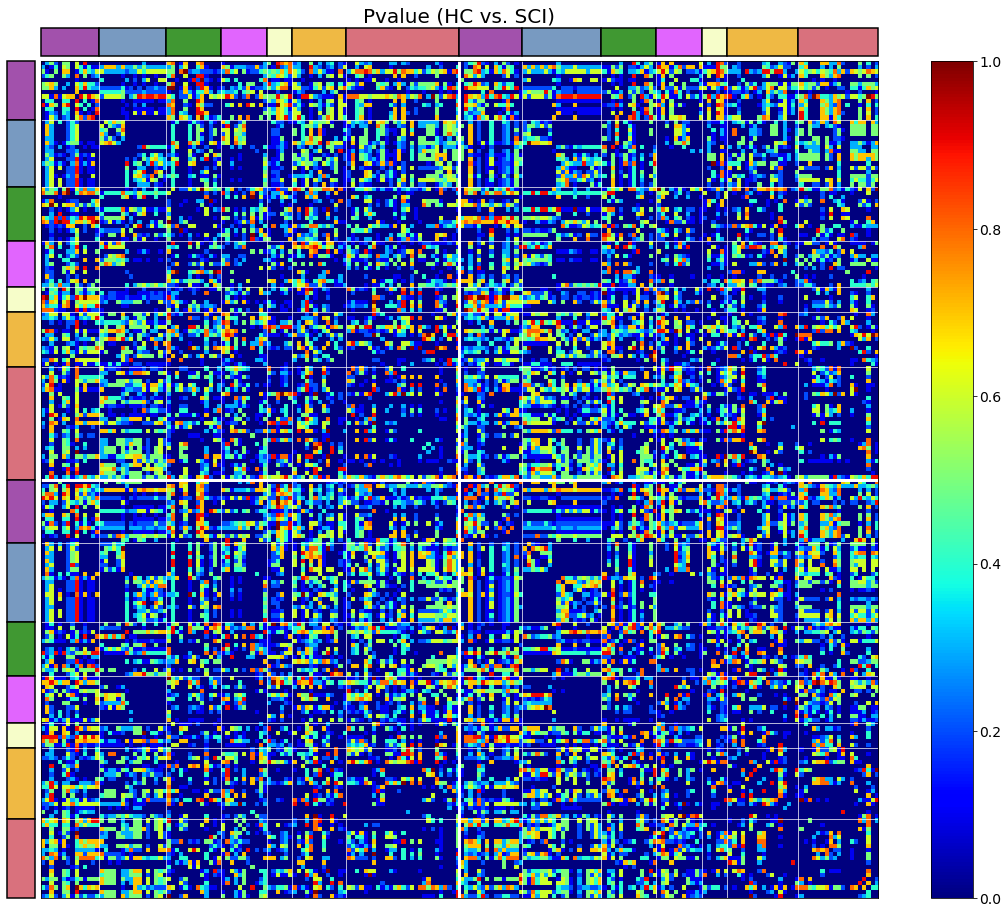

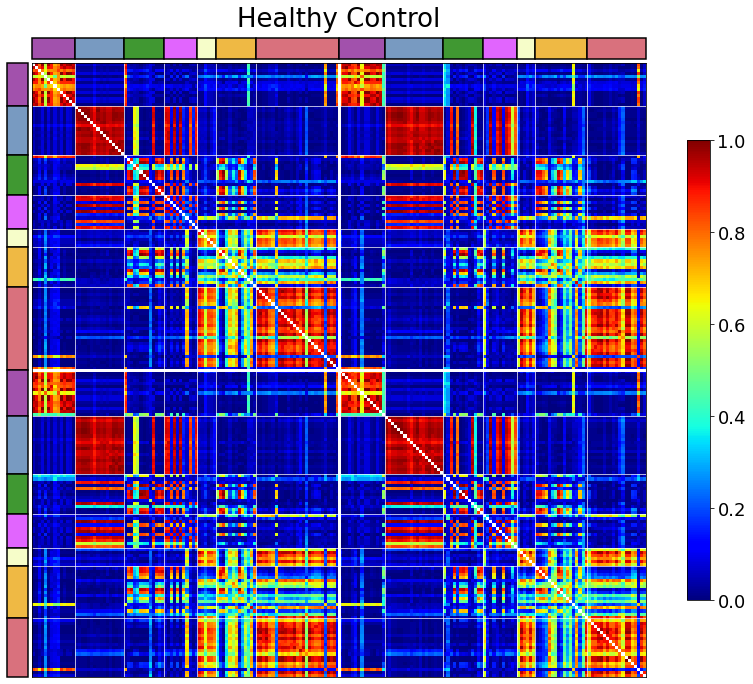

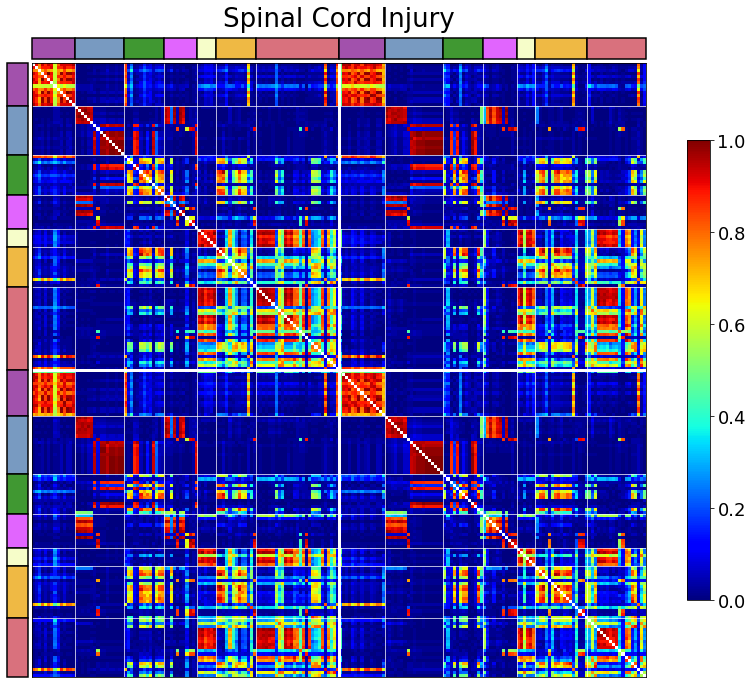

In [53]:
# plot pvalue
cmap='jet' # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap
# Healthy Control
f = plt.figure(figsize=(19,15))
plt.matshow(pvalue, fignum=f.number, vmin = 0, vmax = 1, cmap=cmap) # jet, rainbow, twilight_shifted, terrain, gist_earth, gnuplot, CMRmap
plt.title('Pvalue (HC vs. SCI)', fontsize=20, y=1.04)
# plt.xticks(range(allegiance[0].shape[1]), labels, fontsize=10, rotation=90) #systems or labels
# plt.yticks(range(allegiance[0].shape[1]), labels, fontsize=10)
plt.xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
plt.yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
cb = plt.colorbar() 
cb.ax.tick_params(labelsize=14)
plt.axvline(x=100-0.5,color='white',linewidth=3)
plt.axhline(y=100-0.5,color='white',linewidth=3)
# Draw grid lines
plt.grid(color='white', linestyle='-', linewidth=0.7)
plt.tick_params(
    axis='both',       # changes apply to the x,y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labeltop=False,    # labels along the top edge are off
    labelleft=False)   # labels along the left edge are off
# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = plt.axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept
plt.gca().add_patch(patches.Rectangle((-0.5, i), width=13.5+0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((180.5, i), width=199.5-180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
plt.gca().add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/pvalue_diff.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

# regression between two groups [integration, recruitment]
# define permutation test using monte-carlo method
def perm_test(xs, ys, nmc):
    n, k = len(xs), 0
    diff = np.abs(np.mean(xs) - np.mean(ys))
    zs = np.concatenate([xs, ys])
    for j in range(nmc):
        np.random.shuffle(zs)
        k += diff < np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
    return k / nmc



#%% Allegiance matrix plots [Consensus (Mean)] [Consensus (Mode)] 
cmap='jet' # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap
# Group 1
f = plt.figure(figsize=(15,11))
plt.matshow(allegiance[0], fignum=f.number, vmin = 0, vmax = 1, cmap=cmap) # jet, rainbow, twilight_shifted, terrain, gist_earth, gnuplot, CMRmap
plt.title(group_label[0] , fontsize=26, y=1.05)
#plt.xticks(range(allegiance[0].shape[1]), labels, fontsize=10, rotation=90) #systems or labels
#plt.yticks(range(allegiance[0].shape[1]), labels, fontsize=10)
plt.xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
plt.yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
cb=plt.colorbar(shrink=0.75) 
cb.ax.tick_params(labelsize=18)
plt.axvline(x=100-0.5,color='white', linewidth=3)
plt.axhline(y=100-0.5,color='white', linewidth=3)
# Draw grid lines
plt.grid(color='white', linestyle='-', linewidth=0.7)
plt.tick_params(
    axis='both',       # changes apply to the x,y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labeltop=False,    # labels along the top edge are off
    labelleft=False)   # labels along the left edge are off
# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = plt.axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept
plt.gca().add_patch(patches.Rectangle((-0.5, i), width=13.5+0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((180.5, i), width=199.5-180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
plt.gca().add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/allegiance_g1'+analysis+'.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

# Group 2  [Consensus (Mean)] [Consensus (Mode)] +" [Consensus (Mean)]"
f = plt.figure(figsize=(15,11))
plt.matshow(allegiance[1], fignum=f.number, vmin = 0, vmax = 1, cmap=cmap) # jet, rainbow, twilight_shifted, terrain, gist_earth, gnuplot, CMRmap
plt.title(group_label[1], fontsize=26, y=1.05)
#plt.xticks(range(allegiance[0].shape[1]), labels, fontsize=10, rotation=90) #systems or labels
#plt.yticks(range(allegiance[0].shape[1]), labels, fontsize=10)
plt.xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
plt.yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
cb = plt.colorbar(shrink=0.75) 
cb.ax.tick_params(labelsize=18)
plt.axvline(x=100-0.5,color='white',linewidth=3)
plt.axhline(y=100-0.5,color='white',linewidth=3)
# Draw grid lines
plt.grid(color='white', linestyle='-', linewidth=0.7)
plt.tick_params(
    axis='both',       # changes apply to the x,y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labeltop=False,    # labels along the top edge are off
    labelleft=False)   # labels along the left edge are off
# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = plt.axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept
plt.gca().add_patch(patches.Rectangle((-0.5, i), width=13.5+0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((180.5, i), width=199.5-180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
plt.gca().add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/allegiance_g2'+analysis+'.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

## recruitment and integration coeeficiencts for each brain region

node_coords = np.array([(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)])
 

In [54]:
pvalue_list = []
allegiance_hc_list = []
allegiance_sci_list = []
os.chdir('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/')

In [55]:
pvalue_list.append(pvalue)
allegiance_hc_list.append(allegiance[0])
allegiance_sci_list.append(allegiance[1])

In [56]:
# pvalue_list.pop(10)
print(f'pvalue:{len(pvalue_list)} alleg-hc:{len(allegiance_hc_list)} alleg-sci:{len(allegiance_hc_list)}')

# pv_mean_array = np.mean(pvalue_list, axis=0)
# pv_std_array = np.std(pvalue_list, axis=0)

# alleg1_mean_array = np.mean(allegiance_hc_list, axis=0)
# alleg1_std_array = np.std(allegiance_hc_list, axis=0)

# alleg2_mean_array = np.mean(allegiance_sci_list, axis=0)
# alleg2_std_array = np.std(allegiance_sci_list, axis=0)

# #variance_array = np.var(pvalue_list, axis=0)
# print(f"pv_mean_array:{pv_mean_array.shape} alleg1_mean_array: {alleg1_mean_array.shape}, alleg2_mean_array: {alleg2_mean_array.shape}")

# alleg1_mean_array = np.where(np.isnan(alleg1_mean_array), 0, alleg1_mean_array)
# alleg1_std_array = np.where(np.isnan(alleg1_std_array), 0, alleg1_std_array)
# alleg2_mean_array = np.where(np.isnan(alleg2_mean_array), 0, alleg2_mean_array)
# alleg2_std_array = np.where(np.isnan(alleg2_std_array), 0, alleg2_std_array)

 
# # print(f"{pc_mean_array.shape} Mean: {pc_mean_array}, Stdev: {pc_std_array}")
# # print(f"{alleg1_mean_array.shape} Mean: {alleg1_mean_array}, Stdev: {alleg1_std_array}")

# #np.savetxt('std_pvalue.csv', std_array)
# #np.savetxt('mean_pvalue.csv', mean_array)

pvalue:1 alleg-hc:1 alleg-sci:1


In [28]:
# print(f"pv_mean_array:{np.mean(pv_mean_array.flatten())}, pv_std_array: {np.mean(pv_std_array.flatten())}")
# print(f"alleg1_mean_array:{np.mean(alleg1_mean_array.flatten())}, alleg1_std_array: {np.mean(alleg1_std_array.flatten())}")
# print(f"alleg2_mean_array:{np.mean(alleg2_mean_array.flatten())}, alleg2_std_array: {np.mean(alleg2_std_array.flatten())}")

In [163]:
# 1.15 Mean: 0.22118, Stdev: 0.21168 
# 1.16 Mean: 0.22688, Stdev: 0.21250 
# 1.17 Mean: 0.22057, Stdev: 0.23034 
# 1.18 Mean: 0.20727, Stdev: 0.22014 
# 1.19 Mean: 0.20411, Stdev: 0.21237 
# 1.20 Mean: 0.20310, Stdev: 0.21282 
# 1.21 Mean: 0.19685, Stdev: 0.19859 
# 1.21 Mean: 0.20841, Stdev: 0.20985 
# 1.22 Mean: 0.19739, Stdev: 0.20409 
# 1.23 Mean: 0.20442, Stdev: 0.20588 
# 1.24 Mean: 0.21672, Stdev: 0.20725 
# 1.25 Mean: 0.20756, Stdev: 0.19146 

# 116
# pv_mean_array:0.23451,     pv_std_array: 0.22589
# alleg1_mean_array:0.29753, alleg1_std_array: 0.07045
# alleg2_mean_array:0.26481, alleg2_std_array: 0.06791

# 117
# pv_mean_array:0.23038,     pv_std_array: 0.21958  
# alleg1_mean_array:0.31910, alleg1_std_array: 0.06844  
# alleg2_mean_array:0.27215, alleg2_std_array: 0.06848 

# 120
# pv_mean_array:0.22623,     pv_std_array: 0.21215 
# alleg1_mean_array:0.26488, alleg1_std_array: 0.05420  
# alleg2_mean_array:0.22558, alleg2_std_array: 0.07559  

# 121
# pv_mean_array_2:0.20803,     pv_std_array_2:0.21644  
# alleg1_mean_array_2:0.25600, alleg1_std_array_2: 0.08246  
# alleg2_mean_array_2:0.21120, alleg2_std_array_2: 0.07897  

# 122
# pv_mean_array:0.21726,     pv_std_array: 0.20775  
# alleg1_mean_array:0.24062, alleg1_std_array: 0.07452  
# alleg2_mean_array:0.19452, alleg2_std_array: 0.06667  



# G1 vs G2

# G1
# pv_mean_array:0.22123050000000002, pv_std_array: 0.22027662394344616
# alleg1_mean_array:0.24911276315789474, alleg1_std_array: 0.0870248164716183
# alleg2_mean_array:0.20651959016393442, alleg2_std_array: 0.06927349242610112

# G2
# pv_mean_array:0.3227455, pv_std_array: 0.19572563717590605
# alleg1_mean_array:0.2355016129032258, alleg1_std_array: 0.036885257992111314
# alleg2_mean_array:0.23040517857142853, alleg2_std_array: 0.030798841730958145



### 10x Mean p-value matrix

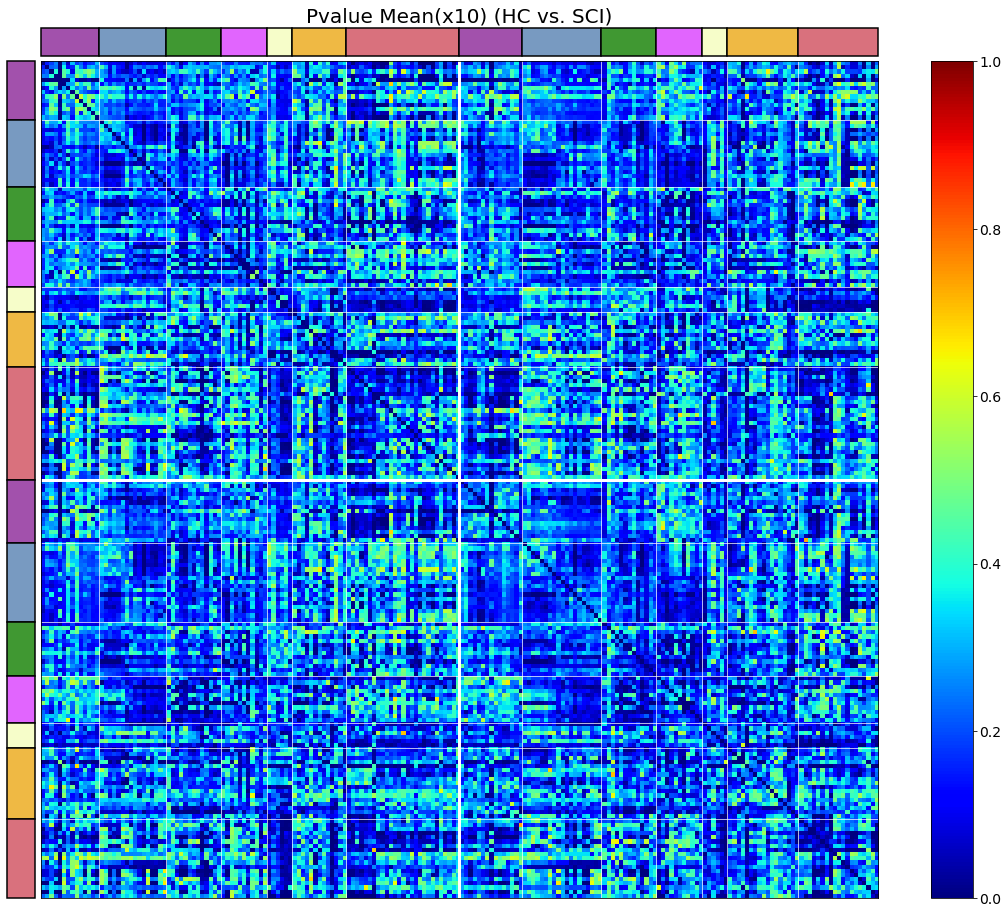

In [341]:
# plot pvalue   pv_mean_array pv_std_array  
cmap='jet' # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap
# Healthy Control
n=['Mean','Stdev']
f = plt.figure(figsize=(19,15))
plt.matshow(pv_mean_array, fignum=f.number, vmin = 0, vmax = 1, cmap=cmap) # jet, rainbow, twilight_shifted, terrain, gist_earth, gnuplot, CMRmap
plt.title('Pvalue '+n[0]+'(x10) (HC vs. SCI)', fontsize=20, y=1.04)
# plt.xticks(range(allegiance[0].shape[1]), labels, fontsize=10, rotation=90) #systems or labels
# plt.yticks(range(allegiance[0].shape[1]), labels, fontsize=10)
plt.xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
plt.yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
cb = plt.colorbar() 
cb.ax.tick_params(labelsize=14)
plt.axvline(x=100-0.5,color='white',linewidth=3)
plt.axhline(y=100-0.5,color='white',linewidth=3)
# Draw grid lines
plt.grid(color='white', linestyle='-', linewidth=0.7)
plt.tick_params(
    axis='both',       # changes apply to the x,y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labeltop=False,    # labels along the top edge are off
    labelleft=False)   # labels along the left edge are off
# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = plt.axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept
plt.gca().add_patch(patches.Rectangle((-0.5, i), width=13.5+0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((180.5, i), width=199.5-180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
plt.gca().add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/pvalue_diff_'+n[0]+'.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

### 10x Mean Allegiance [HC] Matrix 

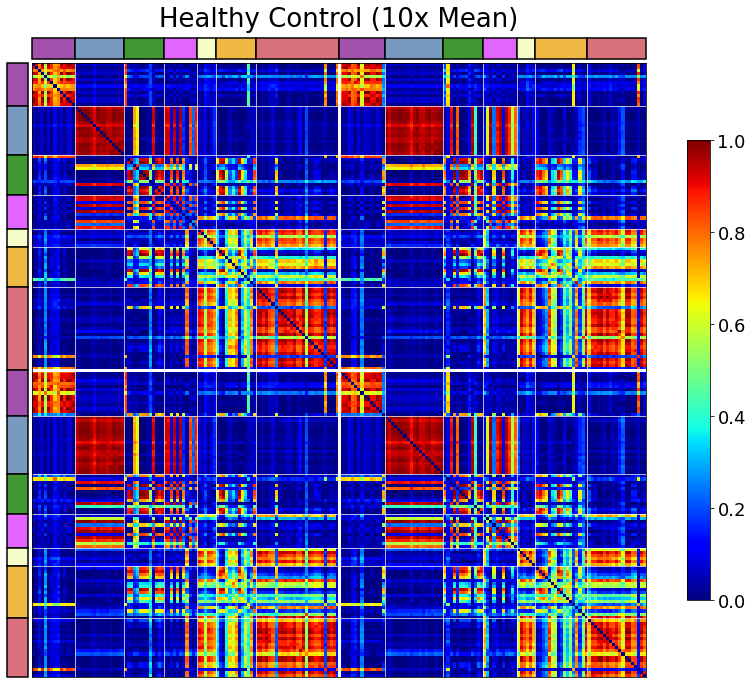

In [99]:
# Group 1 alleg1_mean_array alleg1_std_array
f = plt.figure(figsize=(15,11))
plt.matshow(alleg1_mean_array, fignum=f.number, vmin = 0, vmax = 1, cmap=cmap) # jet, rainbow, twilight_shifted, terrain, gist_earth, gnuplot, CMRmap
plt.title(group_label[0]+' (10x Mean)', fontsize=26, y=1.05)
#plt.xticks(range(allegiance[0].shape[1]), labels, fontsize=10, rotation=90) #systems or labels
#plt.yticks(range(allegiance[0].shape[1]), labels, fontsize=10)
plt.xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
plt.yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
cb=plt.colorbar(shrink=0.75) 
cb.ax.tick_params(labelsize=18)
plt.axvline(x=100-0.5,color='white', linewidth=3)
plt.axhline(y=100-0.5,color='white', linewidth=3)
# Draw grid lines
plt.grid(color='white', linestyle='-', linewidth=0.7)
plt.tick_params(
    axis='both',       # changes apply to the x,y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labeltop=False,    # labels along the top edge are off
    labelleft=False)   # labels along the left edge are off
# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = plt.axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept
plt.gca().add_patch(patches.Rectangle((-0.5, i), width=13.5+0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((180.5, i), width=199.5-180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
plt.gca().add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/allegiance_hc_mean.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

### 10x Mean Allegiance [SCI] Matrix 

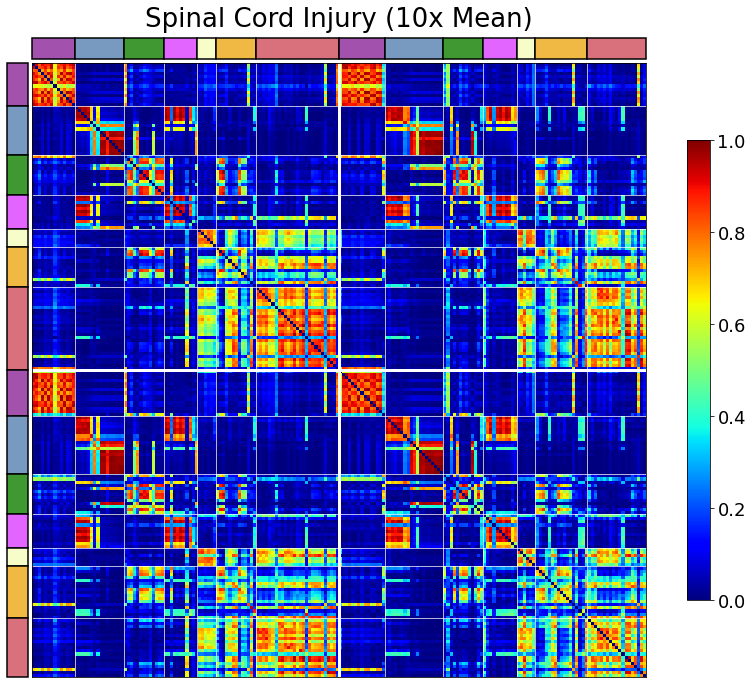

In [99]:
# Group 2 alleg2_mean_array alleg2_std_array
f = plt.figure(figsize=(15,11))
plt.matshow(alleg2_mean_array, fignum=f.number, vmin = 0, vmax = 1, cmap=cmap) # jet, rainbow, twilight_shifted, terrain, gist_earth, gnuplot, CMRmap
plt.title(group_label[1]+' (10x Mean)', fontsize=26, y=1.05)
#plt.xticks(range(allegiance[0].shape[1]), labels, fontsize=10, rotation=90) #systems or labels
#plt.yticks(range(allegiance[0].shape[1]), labels, fontsize=10)
plt.xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
plt.yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
cb = plt.colorbar(shrink=0.75) 
cb.ax.tick_params(labelsize=18)
plt.axvline(x=100-0.5,color='white',linewidth=3)
plt.axhline(y=100-0.5,color='white',linewidth=3)
# Draw grid lines
plt.grid(color='white', linestyle='-', linewidth=0.7)
plt.tick_params(
    axis='both',       # changes apply to the x,y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labeltop=False,    # labels along the top edge are off
    labelleft=False)   # labels along the left edge are off
# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = plt.axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept
plt.gca().add_patch(patches.Rectangle((-0.5, i), width=13.5+0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((13.5, i), width=29.5-13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((29.5, i), width=42.5-29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((42.5, i), width=53.5-42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((53.5, i), width=59.5-53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((59.5, i), width=72.5-59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((72.5, i), width=99.5-72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((99.5, i), width=114.5-99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((114.5, i), width=133.5-114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((133.5, i), width=146.5-133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((146.5, i), width=157.5-146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((157.5, i), width=163.5-157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((163.5, i), width=180.5-163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((180.5, i), width=199.5-180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
plt.gca().add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
plt.gca().add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

# plt.tight_layout()
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/allegiance_sci_mean.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

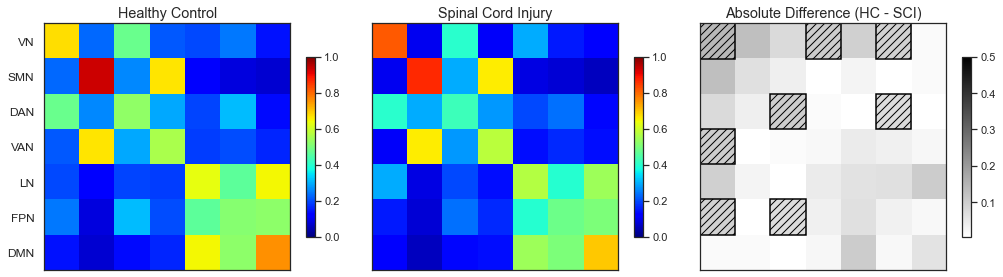

In [17]:
#%% Coarse Allegiance matrix plots (Functional Cartography)

networks_lr = ['Vis_L', 'SomMot_L', 'DorsAttn_L', 'SalVentAttn_L', 'Limbic_L', 'Cont_L', 'Default_L', 'Vis_R', 'SomMot_R', 'DorsAttn_R', 'SalVentAttn_R', 'Limbic_R', 'Cont_R', 'Default_R']
networks = ['VN', 'SMN', 'DAN', 'VAN', 'LN', 'FPN', 'DMN']
cmap='jet' # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap, seismic

# pvalue_c = perm_test_allegiance_coarse(S_g1, S_g2, nmc=1000)

# pvalue = np.array([[0.   , 0.   , 0.001, 0.003, 0.   , 0.052, 0.013],
#        [0.   , 0.   , 0.   , 0.   , 0.007, 0.002, 0.023],
#        [0.001, 0.   , 0.   , 0.271, 0.681, 0.   , 0.025],
#        [0.003, 0.   , 0.271, 0.   , 0.423, 0.   , 0.158],
#        [0.   , 0.007, 0.681, 0.423, 0.007, 0.087, 0.   ],
#        [0.052, 0.002, 0.   , 0.   , 0.087, 0.26 , 0.219],
#        [0.013, 0.023, 0.025, 0.158, 0.   , 0.219, 0.   ]]) 

# Find the indices of cells that are equal to 0
sig_cells = np.argwhere(pvalue_c == 0)

# Define hatching properties
hatch_props = dict(color="black", alpha=1.0, linewidth=1.5, hatch="///")

fig, axes = plt.subplots(ncols=3, figsize=(18,6))

# G1 (e.g., HC)
im1 = axes[0].imshow(allegiance_coarse[0], vmin=0, vmax=1, cmap=cmap) # jet, rainbow, twilight_shifted, terrain, gist_earth, gnuplot, CMRmap
axes[0].set_title(group_label[0], size='large')
axes[0].set_yticks(range(allegiance_coarse[0].shape[1]))
axes[0].set_yticklabels(networks, fontsize=12, rotation=0)
axes[0].tick_params(left=False,right=False,bottom=False,top=False,
                labelleft=True, labelright=False, labelbottom=False, labeltop=False)
# Add colorbar for G1
cbar1 = fig.colorbar(im1, ax=axes[0], shrink=0.5)

# G2 (e.g., SCI)
im2 = axes[1].imshow(allegiance_coarse[1], vmin=0, vmax=1, cmap=cmap)
axes[1].set_title(group_label[1], size='large')
axes[1].set_yticks(range(allegiance_coarse[0].shape[1]))
axes[1].set_yticklabels(networks, fontsize=12, rotation=0)
axes[1].tick_params(left=False,right=False,bottom=False,top=False,
                labelleft=False, labelright=False, labelbottom=False, labeltop=False)
# Add colorbar for G2
cbar2 = fig.colorbar(im2, ax=axes[1], shrink=0.5)

# Calculate the absolute difference between the two matrices
diff = np.abs(allegiance_coarse[0] - allegiance_coarse[1])
# Create a new subplot for the difference
im3 = axes[2].imshow(diff, vmax=.5, cmap='binary')
axes[2].set_title('Absolute Difference (HC - SCI)', size='large')
axes[2].set_yticks(range(allegiance_coarse[0].shape[1]))
axes[2].set_yticklabels(networks, fontsize=12, rotation=0)
axes[2].tick_params(left=False, right=False, bottom=False, top=False,
                labelleft=False, labelright=False, labelbottom=False, labeltop=False)
# Add hatching to significant cells
for cell in sig_cells:
    plt.gca().add_patch(Rectangle((cell[1]-0.5, cell[0]-0.5), 1, 1, fill=False, **hatch_props))
# Add colorbar for difference
cbar3 = fig.colorbar(im3, ax=axes[2], shrink=0.5)

# =============================================================================
# # Set the label for each colorbar
# cbar1.set_label('Allegiance')
# cbar2.set_label('Allegiance')
# cbar3.set_label('Difference')
# =============================================================================

plt.tight_layout(pad=3.0) # spacing between subplots

fig.subplots_adjust(right=0.8)

plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/allegiance_net_'+analysis+'.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)



In [18]:
# pip install mne.connectivity
#%% Creating Circular flow charts (circos or chord)
# https://mne.tools/mne-connectivity/dev/generated/mne_connectivity.viz.plot_connectivity_circle.html
# https://stackoverflow.com/questions/33388867/creating-circular-flow-charts-circos
# https://www.python-graph-gallery.com/406-chord-diagram_mne

# fig = plt.figure(num=None, figsize=(8, 8), facecolor='black')
# plot_connectivity_circle(conmat, label_names, n_lines=300,
#                          node_angles=node_angles, node_colors=node_colors,
#                          title='All-to-All Connectivity left-Auditory'
#                          'Condition (PLI)', fig=fig)

In [21]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:31:08.723778


In [21]:
# import os
# os.environ['SUBJECTS_DIR'] # Sanity check

In [22]:
# import types
# import pip #needed to use the pip functions
# # for i in pip.get_installed_distributions(local_only=True):
# #     print(i)

# def imports():
#     for name, val in globals().items():
#         if isinstance(val, types.ModuleType):
#             yield val.__name__
# list(imports())

In [23]:
import pkg_resources

installed_packages = pkg_resources.working_set
for package in installed_packages:
    print(f"{package.key}=={package.version}")

ipykernel==5.5.5
jupyter-console==6.4.4
notebook==6.5.6
babel==2.11.0
bottleneck==1.3.5
brotli==1.0.9
jinja2==3.1.2
markupsafe==2.1.1
pillow==10.1.0
pyqt5==5.15.10
pyqt5-sip==12.13.0
pyqtwebengine==5.15.6
pysocks==1.7.1
pyyaml==6.0.1
pygments==2.15.1
qdarkstyle==3.0.2
qtawesome==1.2.2
qtpy==2.4.1
rtree==1.0.1
sqlalchemy==2.0.23
send2trash==1.8.2
sphinx==5.0.2
unidecode==1.2.0
alabaster==0.7.12
anyio==3.5.0
applaunchservices==0.3.0
appnope==0.1.2
apptools==5.2.1
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
astor==0.8.1
astroid==2.14.2
asttokens==2.0.5
atomicwrites==1.4.0
attrs==23.1.0
autopep8==1.6.0
backcall==0.2.0
bctpy==0.6.1
beautifulsoup4==4.12.2
bids-validator==1.13.1
binaryornot==0.4.4
black==0.0
bleach==4.1.0
brainconn==0.0.1
certifi==2023.11.17
cffi==1.16.0
cftime==1.6.3
chardet==4.0.0
charset-normalizer==2.0.4
citeproc-py==0.6.0
click==8.1.7
cloudpickle==2.2.1
colorama==0.4.6
comm==0.1.2
configobj==5.0.8
contourpy==1.2.0
cookiecutter==1.7.3
cryptography==41.0.

<ipython-input-23-80b1638e1925>:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
